BY: https://github.com/AssanaliAbu/Hand-Gesture-Recognition

In [18]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [19]:
# Specify data paths
dataset = 'keypoint.csv'
model_save_path = 'keypoint_classifier/keypoint_classifier.hdf5'

# Set number of classes

In [20]:
# Change training classes if necessary
NUM_CLASSES = 2

# Dataset reading

In [21]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [22]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1], dtype=int32), array([794, 799]))


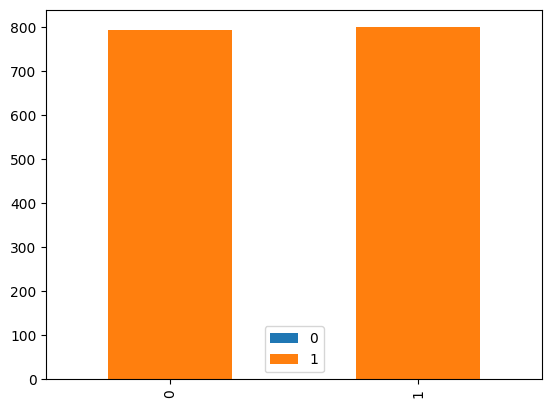

In [24]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [26]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 42)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1376      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 2)                

In [27]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [28]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [29]:
model.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/40
 1/19 [>.............................] - ETA: 3s - loss: 0.7118 - accuracy: 0.4219
Epoch 1: val_loss improved from inf to 0.63633, saving model to keypoint_classifier/keypoint_classifier.hdf5
19/19 [==============================] - 0s 7ms/step - loss: 0.6647 - accuracy: 0.5628 - val_loss: 0.6363 - val_accuracy: 0.7293
Epoch 2/40
 1/19 [>.............................] - ETA: 0s - loss: 0.6480 - accuracy: 0.6875
Epoch 2: val_loss improved from 0.63633 to 0.57629, saving model to keypoint_classifier/keypoint_classifier.hdf5
19/19 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.8174 - val_loss: 0.5763 - val_accuracy: 0.8872
Epoch 3/40
 1/19 [>.............................] - ETA: 0s - loss: 0.5745 - accuracy: 0.8594
Epoch 3: val_loss improved from 0.57629 to 0.47492, saving model to keypoint_classifier/keypoint_classifier.hdf5
19/19 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.9045 - val_loss: 0.4749 - val_accuracy: 0.8

In [30]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [31]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

7/7 [==============================] - 0s 583us/step - loss: 5.8674e-04 - accuracy: 1.0000


In [15]:
import tensorflow 
from tensorflow.keras.models import load_model

In [16]:
model = load_model(model_save_path)

# Confusion matrix

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

ModuleNotFoundError: No module named 'seaborn'